In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/DowJones.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2001-01-02,10790.919922,10797.019531,10585.360352,10646.150391,253300000
1,2001-01-03,10637.419922,11019.049805,10581.089844,10945.750000,420720000
2,2001-01-04,10944.940430,11028.000000,10888.419922,10912.410156,382800000
3,2001-01-05,10912.809570,10919.419922,10627.750000,10662.009766,272650000
4,2001-01-06,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
8481,2024-03-23,NaN,NaN,NaN,NaN,0
8482,2024-03-24,NaN,NaN,NaN,NaN,0
8483,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000
8484,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2001-01-02,10790.919922,10797.019531,10585.360352,10646.150391,253300000
1,2001-01-03,10637.419922,11019.049805,10581.089844,10945.750000,420720000
2,2001-01-04,10944.940430,11028.000000,10888.419922,10912.410156,382800000
3,2001-01-05,10912.809570,10919.419922,10627.750000,10662.009766,272650000
4,2001-01-08,10658.730469,10700.849609,10516.019531,10621.349609,225780000
...,...,...,...,...,...,...
5840,2024-03-21,39661.031250,39889.050781,39589.230469,39781.371094,408990000
5841,2024-03-22,39774.058594,39824.761719,39469.531250,39475.898438,332340000
5842,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000
5843,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5845 non-null   datetime64[ns]
 1   Open    5845 non-null   float64       
 2   High    5845 non-null   float64       
 3   Low     5845 non-null   float64       
 4   Close   5845 non-null   float64       
 5   Volume  5845 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 274.1 KB


In [6]:
df.shape


(5845, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

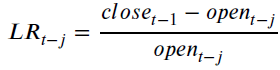

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2001-01-02,10790.919922,10797.019531,10585.360352,10646.150391,253300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,10637.419922,11019.049805,10581.089844,10945.750000,420720000,-0.013416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-04,10944.940430,11028.000000,10888.419922,10912.410156,382800000,0.028985,0.014348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-05,10912.809570,10919.419922,10627.750000,10662.009766,272650000,-0.002972,0.025851,0.011259,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-08,10658.730469,10700.849609,10516.019531,10621.349609,225780000,-0.022982,-0.025850,0.002312,-0.011946,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,39661.031250,39889.050781,39589.230469,39781.371094,408990000,0.011263,0.017839,0.017648,0.018101,0.009962,0.026725,0.058971,0.142778,0.218731
5841,2024-03-22,39774.058594,39824.761719,39469.531250,39475.898438,332340000,0.003034,0.018154,0.024775,0.024582,0.025038,0.024100,0.060267,0.158718,0.221404
5842,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000,-0.007496,-0.004668,0.010336,0.016906,0.016714,0.008892,0.060458,0.158430,0.229722
5843,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000,-0.002459,-0.011576,-0.008759,0.006183,0.012726,0.004314,0.052595,0.159435,0.227086


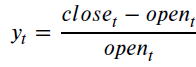

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2001-01-02,10790.919922,10797.019531,10585.360352,10646.150391,253300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013416
1,2001-01-03,10637.419922,11019.049805,10581.089844,10945.750000,420720000,-0.013416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028985
2,2001-01-04,10944.940430,11028.000000,10888.419922,10912.410156,382800000,0.028985,0.014348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002972
3,2001-01-05,10912.809570,10919.419922,10627.750000,10662.009766,272650000,-0.002972,0.025851,0.011259,NaN,NaN,NaN,NaN,NaN,NaN,-0.022982
4,2001-01-08,10658.730469,10700.849609,10516.019531,10621.349609,225780000,-0.022982,-0.025850,0.002312,-0.011946,NaN,NaN,NaN,NaN,NaN,-0.003507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,39661.031250,39889.050781,39589.230469,39781.371094,408990000,0.011263,0.017839,0.017648,0.018101,0.009962,0.026725,0.058971,0.142778,0.218731,0.003034
5841,2024-03-22,39774.058594,39824.761719,39469.531250,39475.898438,332340000,0.003034,0.018154,0.024775,0.024582,0.025038,0.024100,0.060267,0.158718,0.221404,-0.007496
5842,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000,-0.007496,-0.004668,0.010336,0.016906,0.016714,0.008892,0.060458,0.158430,0.229722,-0.002459
5843,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000,-0.002459,-0.011576,-0.008759,0.006183,0.012726,0.004314,0.052595,0.159435,0.227086,-0.001423


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2002-01-08,10195.759766,10211.230469,10121.349609,10150.549805,193640000,-0.006264,0.001986,0.012227,0.017496,0.005987,0.008258,0.118619,-0.037005,-0.055034,-0.004434
253,2002-01-09,10153.179688,10270.879883,10069.450195,10094.089844,247850000,-0.004434,-0.010796,-0.002583,0.007611,0.012856,0.005091,0.119559,-0.039340,-0.045770,-0.005820
254,2002-01-10,10092.500000,10101.769531,10032.230469,10067.860352,199300000,-0.005820,-0.009972,-0.016298,-0.008131,0.002006,0.004683,0.115086,-0.036523,-0.077739,-0.002441
255,2002-01-11,10069.519531,10098.379883,9985.250000,9987.530273,197880000,-0.002441,-0.008403,-0.012544,-0.018854,-0.010709,0.014333,0.089285,-0.018117,-0.077427,-0.008142
256,2002-01-14,9985.379883,9985.379883,9889.269531,9891.419922,229950000,-0.008142,-0.010401,-0.016315,-0.020423,-0.026683,0.010140,0.061479,-0.030414,-0.062972,-0.009410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,39661.031250,39889.050781,39589.230469,39781.371094,408990000,0.011263,0.017839,0.017648,0.018101,0.009962,0.026725,0.058971,0.142778,0.218731,0.003034
5841,2024-03-22,39774.058594,39824.761719,39469.531250,39475.898438,332340000,0.003034,0.018154,0.024775,0.024582,0.025038,0.024100,0.060267,0.158718,0.221404,-0.007496
5842,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000,-0.007496,-0.004668,0.010336,0.016906,0.016714,0.008892,0.060458,0.158430,0.229722,-0.002459
5843,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000,-0.002459,-0.011576,-0.008759,0.006183,0.012726,0.004314,0.052595,0.159435,0.227086,-0.001423


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (3915, 9)
y_train:  (3915,)
x_valid:  (838, 9)
y_valid:  (838,)
x_test:  (840, 9)
y_test:  (840,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 100, 'epsilon': 0.0001, 'gamma': 0.001}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 100, 'epsilon': 0.0001, 'gamma': 0.001}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [19]:
print(train_rmse,valid_rmse,test_rmse )

0.011064915290125175 0.010218024389650977 0.008095429665153992


In [20]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-20-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
4167,2017-07-27,21717.419922,21798.470703,21687.849609,21796.550781,407320000,0.000951,0.003348,0.006174,0.005525,0.003210,0.014003,0.034295,0.081428,0.175266,0.003644,0.000564
4168,2017-07-28,21787.509766,21841.179688,21756.119141,21830.310547,285630000,0.003644,0.004895,0.007301,0.010139,0.009487,0.019848,0.038555,0.084224,0.180680,0.001964,0.000294
4169,2017-07-31,21863.390625,21929.800781,21861.710938,21891.119141,307610000,0.001964,0.005198,0.006451,0.008861,0.011703,0.015960,0.041387,0.089956,0.183695,0.001268,0.000307
4170,2017-08-01,21961.419922,21990.960938,21940.810547,21963.919922,328410000,0.001268,0.004755,0.007998,0.009255,0.011672,0.025412,0.045362,0.099329,0.187508,0.000114,0.000407
4171,2017-08-02,22004.359375,22036.099609,21967.460938,22016.240234,336820000,0.000114,0.004598,0.008097,0.011350,0.012611,0.026721,0.050152,0.102396,0.193617,0.000540,0.000463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,29672.359375,29964.289062,29672.359375,29950.439453,418290000,0.009448,0.008480,-0.001509,0.007713,0.000404,0.031819,0.058389,0.199464,0.058767,0.009372,-0.000050
5001,2020-11-17,29800.150391,29872.419922,29520.289062,29783.349609,372380000,0.009372,0.025563,0.024580,0.014432,0.023801,0.045991,0.076918,0.224669,0.069918,-0.000564,0.000041
5002,2020-11-18,29875.400391,29930.849609,29432.839844,29438.419922,382850000,-0.000564,0.003741,0.019842,0.018864,0.008772,0.054433,0.078221,0.212466,0.060670,-0.014627,0.001520
5003,2020-11-19,29370.919922,29524.900391,29228.380859,29483.230469,331330000,-0.014627,-0.012139,-0.007884,0.008030,0.007065,0.041306,0.060533,0.203436,0.055914,0.003824,0.001751


In [21]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-21-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4167,2017-07-27,21717.419922,21798.470703,21687.849609,21796.550781,407320000,0.000951,0.003348,0.006174,0.005525,0.003210,0.014003,0.034295,0.081428,0.175266,0.003644,0.000564,21729.660131
4168,2017-07-28,21787.509766,21841.179688,21756.119141,21830.310547,285630000,0.003644,0.004895,0.007301,0.010139,0.009487,0.019848,0.038555,0.084224,0.180680,0.001964,0.000294,21793.904586
4169,2017-07-31,21863.390625,21929.800781,21861.710938,21891.119141,307610000,0.001964,0.005198,0.006451,0.008861,0.011703,0.015960,0.041387,0.089956,0.183695,0.001268,0.000307,21870.112741
4170,2017-08-01,21961.419922,21990.960938,21940.810547,21963.919922,328410000,0.001268,0.004755,0.007998,0.009255,0.011672,0.025412,0.045362,0.099329,0.187508,0.000114,0.000407,21970.352097
4171,2017-08-02,22004.359375,22036.099609,21967.460938,22016.240234,336820000,0.000114,0.004598,0.008097,0.011350,0.012611,0.026721,0.050152,0.102396,0.193617,0.000540,0.000463,22014.550673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,29672.359375,29964.289062,29672.359375,29950.439453,418290000,0.009448,0.008480,-0.001509,0.007713,0.000404,0.031819,0.058389,0.199464,0.058767,0.009372,-0.000050,29670.878298
5001,2020-11-17,29800.150391,29872.419922,29520.289062,29783.349609,372380000,0.009372,0.025563,0.024580,0.014432,0.023801,0.045991,0.076918,0.224669,0.069918,-0.000564,0.000041,29801.372020
5002,2020-11-18,29875.400391,29930.849609,29432.839844,29438.419922,382850000,-0.000564,0.003741,0.019842,0.018864,0.008772,0.054433,0.078221,0.212466,0.060670,-0.014627,0.001520,29920.804289
5003,2020-11-19,29370.919922,29524.900391,29228.380859,29483.230469,331330000,-0.014627,-0.012139,-0.007884,0.008030,0.007065,0.041306,0.060533,0.203436,0.055914,0.003824,0.001751,29422.333823


In [23]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0208 ± 0.0066,LR_2
0.0197 ± 0.0067,LR_1
0.0084 ± 0.0137,LR_3
0.0082 ± 0.0029,LR_5
0.0053 ± 0.0061,LR_63
0.0051 ± 0.0028,LR_21
0.0014 ± 0.0007,LR_252
-0.0025 ± 0.0036,LR_4
-0.0032 ± 0.0049,LR_126


In [22]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=a8c19c81969a8b25960da3b3427c23c1e43dea4f5e062111e0d3767da3ab0a67
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [24]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_2', 'LR_1', 'LR_3', 'LR_5', 'LR_63', 'LR_21', 'LR_252', 'LR_4', 'LR_126']


In [25]:
validation_set_pi=validation_set.copy()
features_to_drop = ['LR_4', 'LR_126','Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_5,LR_21,LR_63,LR_252,Target_variable
4167,2017-07-27,21717.419922,21798.470703,21687.849609,21796.550781,407320000,0.000951,0.003348,0.006174,0.003210,0.014003,0.034295,0.175266,0.003644
4168,2017-07-28,21787.509766,21841.179688,21756.119141,21830.310547,285630000,0.003644,0.004895,0.007301,0.009487,0.019848,0.038555,0.180680,0.001964
4169,2017-07-31,21863.390625,21929.800781,21861.710938,21891.119141,307610000,0.001964,0.005198,0.006451,0.011703,0.015960,0.041387,0.183695,0.001268
4170,2017-08-01,21961.419922,21990.960938,21940.810547,21963.919922,328410000,0.001268,0.004755,0.007998,0.011672,0.025412,0.045362,0.187508,0.000114
4171,2017-08-02,22004.359375,22036.099609,21967.460938,22016.240234,336820000,0.000114,0.004598,0.008097,0.012611,0.026721,0.050152,0.193617,0.000540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,29672.359375,29964.289062,29672.359375,29950.439453,418290000,0.009448,0.008480,-0.001509,0.000404,0.031819,0.058389,0.058767,0.009372
5001,2020-11-17,29800.150391,29872.419922,29520.289062,29783.349609,372380000,0.009372,0.025563,0.024580,0.023801,0.045991,0.076918,0.069918,-0.000564
5002,2020-11-18,29875.400391,29930.849609,29432.839844,29438.419922,382850000,-0.000564,0.003741,0.019842,0.008772,0.054433,0.078221,0.060670,-0.014627
5003,2020-11-19,29370.919922,29524.900391,29228.380859,29483.230469,331330000,-0.014627,-0.012139,-0.007884,0.007065,0.041306,0.060533,0.055914,0.003824


In [26]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [29]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.010207470202445728


In [30]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

1.0554187205248991e-05

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [32]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_252'): 0.010182025363698124, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_252'): 0.010207470202445728, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63'): 0.010199846758353804, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63'): 0.010151615176829555, ('LR_1', 'LR_2', 'LR_3', 'LR_5'): 0.010180467869327671, ('LR_1', 'LR_2', 'LR_3'): 0.010165294689163036, ('LR_1', 'LR_2'): 0.010189592094065702, ('LR_2',): 0.010244725835996702}


In [33]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_252'): 3.5999025952852814e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_252'): 1.0554187205248991e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63'): 1.8177631297173688e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63'): 6.640921282142186e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_5'): 3.7556520323306364e-05, ('LR_1', 'LR_2', 'LR_3'): 5.272970048794158e-05, ('LR_1', 'LR_2'): 2.8432295585275116e-05, ('LR_2',): -2.6701446345724772e-05}


In [34]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63')
Maximum Loss Difference: 6.640921282142186e-05


In [35]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-35-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.00803781043818202


In [38]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-38-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
5005,2020-11-23,29332.820312,29667.750000,29332.820312,29591.269531,387200000,-0.005914,-0.003658,-0.020482,-0.018009,-0.013780,0.030054,0.032315,0.156722,0.051462,0.008811,0.000419,29345.115687
5006,2020-11-24,29746.109375,30116.509766,29746.109375,30046.240234,432760000,0.008811,0.005221,0.007502,-0.009511,-0.007009,0.049864,0.047186,0.151530,0.059944,0.010090,0.000263,29753.943246
5007,2020-11-25,30058.869141,30058.869141,29806.250000,29872.470703,323030000,0.010090,0.024322,0.020677,0.022993,0.005718,0.086617,0.058560,0.186466,0.069994,-0.006201,0.000033,30059.858904
5008,2020-11-27,29911.330078,30015.130859,29819.980469,29910.369141,177040000,-0.006201,0.004248,0.018397,0.014774,0.017076,0.102218,0.044445,0.178727,0.060945,-0.000032,0.001406,29953.385481
5009,2020-11-30,29854.509766,29854.509766,29463.640625,29638.640625,551350000,-0.000032,-0.004940,0.005522,0.019690,0.016061,0.129504,0.044223,0.169172,0.064306,-0.007231,0.000741,29876.645130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,39661.031250,39889.050781,39589.230469,39781.371094,408990000,0.011263,0.017839,0.017648,0.018101,0.009962,0.026725,0.058971,0.142778,0.218731,0.003034,-0.000084,39657.706844
5841,2024-03-22,39774.058594,39824.761719,39469.531250,39475.898438,332340000,0.003034,0.018154,0.024775,0.024582,0.025038,0.024100,0.060267,0.158718,0.221404,-0.007496,0.000588,39797.427155
5842,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000,-0.007496,-0.004668,0.010336,0.016906,0.016714,0.008892,0.060458,0.158430,0.229722,-0.002459,0.001593,39473.322297
5843,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000,-0.002459,-0.011576,-0.008759,0.006183,0.012726,0.004314,0.052595,0.159435,0.227086,-0.001423,0.000731,39367.067931


In [39]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-39-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-40-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
5005,2020-11-23,29332.820312,29667.750000,29332.820312,29591.269531,387200000,-0.005914,-0.003658,-0.020482,-0.018009,-0.013780,0.030054,0.032315,0.156722,0.051462,0.008811,0.000419,29345.115687
5006,2020-11-24,29746.109375,30116.509766,29746.109375,30046.240234,432760000,0.008811,0.005221,0.007502,-0.009511,-0.007009,0.049864,0.047186,0.151530,0.059944,0.010090,0.000263,29753.943246
5007,2020-11-25,30058.869141,30058.869141,29806.250000,29872.470703,323030000,0.010090,0.024322,0.020677,0.022993,0.005718,0.086617,0.058560,0.186466,0.069994,-0.006201,0.000033,30059.858904
5008,2020-11-27,29911.330078,30015.130859,29819.980469,29910.369141,177040000,-0.006201,0.004248,0.018397,0.014774,0.017076,0.102218,0.044445,0.178727,0.060945,-0.000032,0.001406,29953.385481
5009,2020-11-30,29854.509766,29854.509766,29463.640625,29638.640625,551350000,-0.000032,-0.004940,0.005522,0.019690,0.016061,0.129504,0.044223,0.169172,0.064306,-0.007231,0.000741,29876.645130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,39661.031250,39889.050781,39589.230469,39781.371094,408990000,0.011263,0.017839,0.017648,0.018101,0.009962,0.026725,0.058971,0.142778,0.218731,0.003034,-0.000084,39657.706844
5841,2024-03-22,39774.058594,39824.761719,39469.531250,39475.898438,332340000,0.003034,0.018154,0.024775,0.024582,0.025038,0.024100,0.060267,0.158718,0.221404,-0.007496,0.000588,39797.427155
5842,2024-03-25,39410.539062,39430.171875,39296.031250,39313.640625,323670000,-0.007496,-0.004668,0.010336,0.016906,0.016714,0.008892,0.060458,0.158430,0.229722,-0.002459,0.001593,39473.322297
5843,2024-03-26,39338.320312,39439.441406,39277.191406,39282.328125,306940000,-0.002459,-0.011576,-0.008759,0.006183,0.012726,0.004314,0.052595,0.159435,0.227086,-0.001423,0.000731,39367.067931


In [41]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

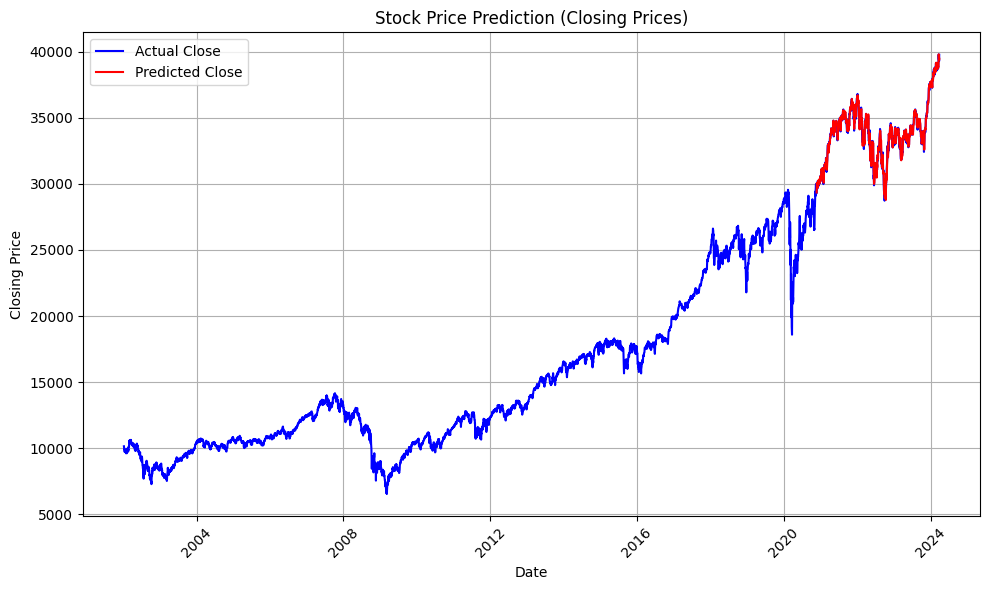

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import lime
import lime.lime_tabular


# 1. Prepare Data
test_set_pi_raw = test_set[selected_features].copy()

# 2. Explainer Initialization
# For LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(x_test_pi, mode='regression')

# LIME Explanation
idx_to_explain = 10  # Choose an index from the test set to explain
explanation_lime = explainer_lime.explain_instance(x_test_pi[idx_to_explain], best_svr_pi_test.predict)
explanation_lime.show_in_notebook()



In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1c25887b21e4ce994652632e687c796c23e9d35d1ff364b78fa52f3b3bd01d9c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
x_test[10]

array([-0.0053994 ,  0.00267521,  0.00497844,  0.01261822,  0.00913798,
        0.05882779,  0.0850932 ,  0.10340194,  0.07441793])

## Datasets to carry out the rest of the study (15-20 Datasets)

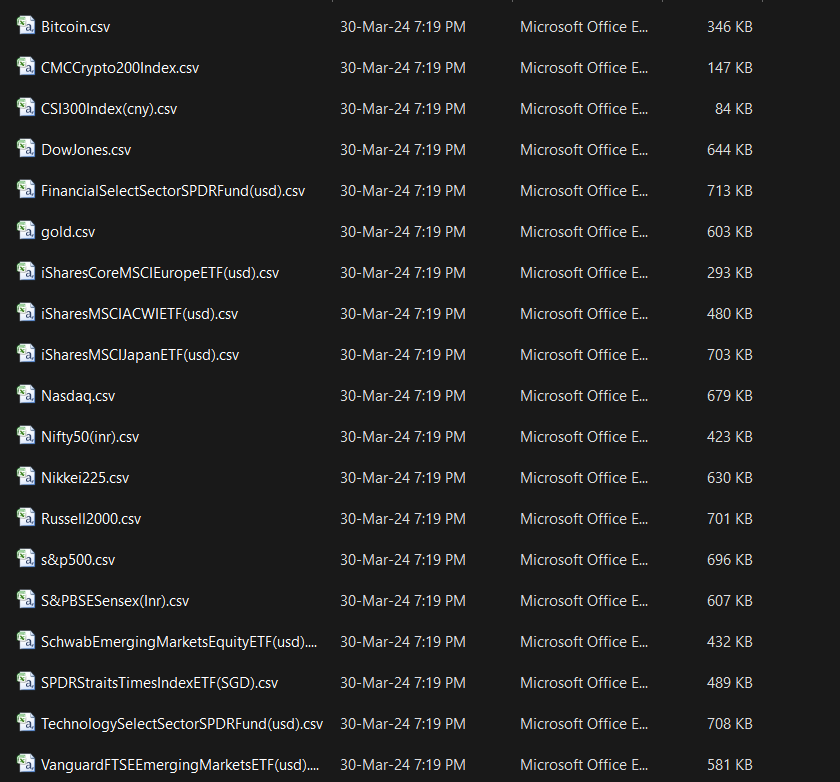

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.010801979766914781
Validation RMSE (GBDT): 0.010890638772311828
Test RMSE (GBDT): 0.008046298340501348


In [44]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (XGBoost): 0.010781173927944226
Validation RMSE (XGBoost): 0.010078517426873587
Test RMSE (XGBoost): 0.008052329795426055


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
Train RMSE (Random Forest): 0.00958743553820471
Validation RMSE (Random Forest): 0.010813444521584375
Test RMSE (Random Forest): 0.00810219825021396
